# Computer Vision and CNN Learning

In [13]:
import tensorflow as tf;
import numpy as np;
import matplotlib.pyplot as plt;
import cv2;
import pandas as pd;
import os;

In [15]:
tf.__version__

'2.17.0'

In [3]:
# !pip install --upgrade tensorflow

In [14]:
import shutil
import os

# shutil.rmtree('pizza_steak')

## Data Generation

In [16]:
import zipfile;

In [17]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip -O pizza_steak.zip

--2024-08-01 22:45:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   196MB/s    in 0.5s    

2024-08-01 22:45:33 (196 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [18]:
zip_ref = zipfile.ZipFile("pizza_steak.zip");
zip_ref.extractall();
zip_ref.close();

In [19]:
!ls pizza_steak

test  train


In [20]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [21]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.");

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


## Data Visualization

In [8]:
import pathlib;
import numpy as np;
import matplotlib.pyplot as plt;

In [9]:
data_dir = pathlib.Path("pizza_steak/train");
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]));
print(class_names);

['pizza' 'steak']


In [10]:
import matplotlib.pyplot as plt;
import matplotlib.image as mpimg;
import random

In [11]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class;
  random_image = random.sample(os.listdir(target_folder), 1);
  print(random_image);

  img = mpimg.imread(target_folder + "/" + random_image[0]);
  plt.imshow(img);
  plt.title(target_class);
  plt.axis("off");

  print(f"Image shape: {img.shape}");

  return img;

['401144.jpg']
Image shape: (512, 306, 3)


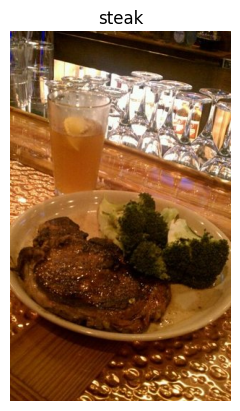

In [22]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak");

['2827938.jpg']
Image shape: (512, 384, 3)


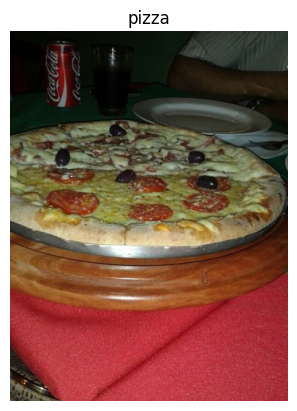

In [23]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza");

In [24]:
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  4,   5,   0],
        [  4,   5,   0],
        [  5,   6,   1],
        ...,
        [ 48,  58,  50],
        [ 48,  58,  50],
        [ 42,  52,  44]],

       [[  4,   5,   0],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [ 48,  58,  50],
        [ 48,  58,  50],
        [ 44,  54,  46]],

       [[  5,   6,   1],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [ 46,  56,  48],
        [ 45,  55,  47],
        [ 45,  55,  47]],

       ...,

       [[ 96,  75,  46],
        [ 91,  71,  44],
        [ 89,  72,  46],
        ...,
        [155,  35,  45],
        [154,  34,  46],
        [163,  43,  55]],

       [[113,  90,  59],
        [ 90,  69,  38],
        [ 91,  71,  44],
        ...,
        [156,  36,  48],
        [148,  28,  40],
        [154,  34,  46]],

       [[123, 100,  68],
        [ 94,  73,  42],
        [106,  85,  56],
        ...,
        [173,  53,  6

## Data Preprocessing and Model Traning

In [25]:
img.shape
# retuns width, height and color channel
# os.removedirs("pizza_steak")

(512, 384, 3)

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator;

tf.random.set_seed(42);

train_datagen = ImageDataGenerator(rescale=1/255.);
test_datagen = ImageDataGenerator(rescale=1/255.);


train_dir = "pizza_steak/train/";
test_dir = "pizza_steak/test/";


train_data = train_datagen.flow_from_directory(train_dir,
                                  batch_size =32,
                                  target_size=(224,224),
                                  class_mode="binary",
                                  seed=42);


test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size =32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42);



model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")
]);


model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]);


history_1 = model_1.fit(train_data,
                        epochs=5,
                        # steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        # validation_steps=len(test_data)
                        );


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.6358 - loss: 0.6187 - val_accuracy: 0.8240 - val_loss: 0.4158
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.8015 - loss: 0.4401 - val_accuracy: 0.8540 - val_loss: 0.3477
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.8281 - loss: 0.3992 - val_accuracy: 0.8580 - val_loss: 0.3754
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8437 - loss: 0.3844 - val_accuracy: 0.8400 - val_loss: 0.3549
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8847 - loss: 0.2881 - val_accuracy: 0.8400 - val_loss: 0.3398


In [22]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

<Axes: >

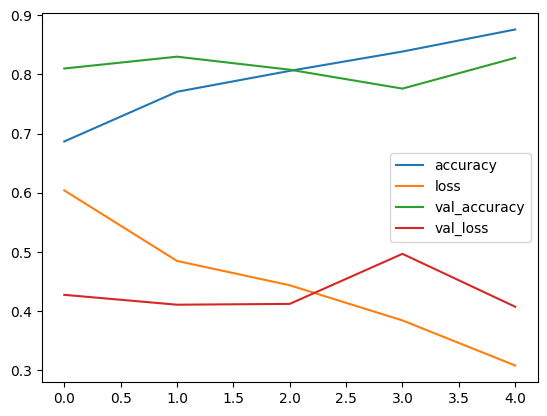

In [23]:
pd.DataFrame(history_1.history).plot()

### Same model from Previous learning

In [24]:
tf.random.set_seed(42);

In [25]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
]);


model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']);

model_2_history = model_2.fit(train_data,
            epochs=5,
            # steps_per_epoch=len(train_data),
            validation_data=test_data,
            # validation_steps=len(test_data)
            );

model_2.summary();

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.5183 - loss: 0.7279 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.4851 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.5058 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.5024 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.4813 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

<Axes: >

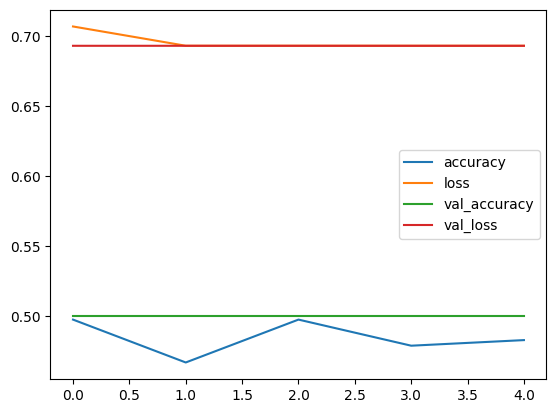

In [26]:
pd.DataFrame(model_2_history.history).plot()

In [28]:
# incraase the dense layer neurons

tf.random.set_seed(42);


model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
]);


model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']);


model_3_history = model_3.fit(train_data,
            epochs=5,
            # steps_per_epoch=len(train_data),
            validation_data=test_data,
            # validation_steps=len(test_data)
            );

model_3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.5078 - loss: 7.0441 - val_accuracy: 0.7580 - val_loss: 0.7298
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6725 - loss: 0.9950 - val_accuracy: 0.7780 - val_loss: 0.4498
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.7407 - loss: 0.5545 - val_accuracy: 0.6060 - val_loss: 1.0711
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.6861 - loss: 0.7355 - val_accuracy: 0.6800 - val_loss: 0.9663
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.7336 - loss: 0.6417 - val_accuracy: 0.7600 - val_loss: 0.4670


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

<Axes: >

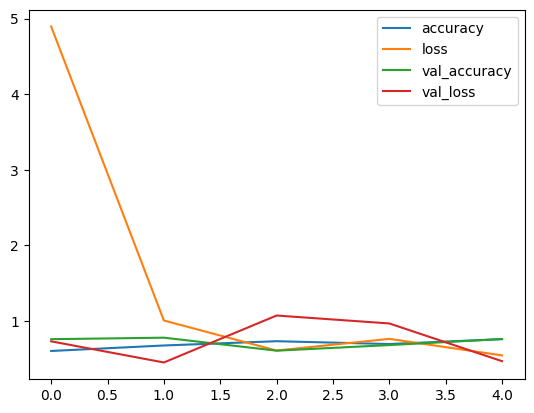

In [29]:
pd.DataFrame(model_3_history.history).plot()


In [ ]:
# model accurancy is good however the validaiton accurancy is very poor
#  looks like model is overfitted with traning data set

['1621763.jpg']
Image shape: (512, 512, 3)
['3767773.jpg']
Image shape: (341, 512, 3)


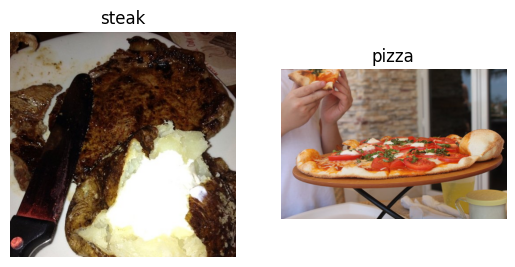

In [27]:
plt.figure();
plt.subplot(1,2,1);
steak_image = view_random_image(target_dir="pizza_steak/train/", target_class="steak");
plt.subplot(1,2,2);
pizza_image = view_random_image(target_dir="pizza_steak/train/", target_class="pizza");

### Create a base line model and then try to improve

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [32]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [46]:
# Get a sample of the training data batch
# [images, labels] = train_data.[0] # get the 'next' batch of images/labels
# len(images), len(labels)
tf.constant(train_data[0][0]).shape, tf.constant(train_data[0][1]).shape

(TensorShape([32, 224, 224, 3]), TensorShape([32]))

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

In [34]:
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
]);


model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']);


model_4_history = model_4.fit(train_data,
            epochs=5,
            # steps_per_epoch=len(train_data),
            validation_data=test_data,
            # validation_steps=len(test_data)
            );

model_4.summary()

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.5873 - loss: 1.6877 - val_accuracy: 0.8220 - val_loss: 0.4434
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.8301 - loss: 0.4094 - val_accuracy: 0.8000 - val_loss: 0.4197
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8964 - loss: 0.2833 - val_accuracy: 0.7960 - val_loss: 0.4668
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9670 - loss: 0.1197 - val_accuracy: 0.8100 - val_loss: 0.4892
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.9906 - loss: 0.0539 - val_accuracy: 0.8140 - val_loss: 0.5287


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

<Axes: >

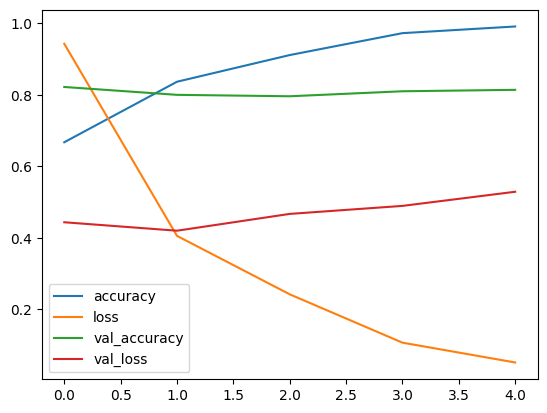

In [35]:
pd.DataFrame(model_4_history.history).plot()

In [36]:
def plot_model_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='validation_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

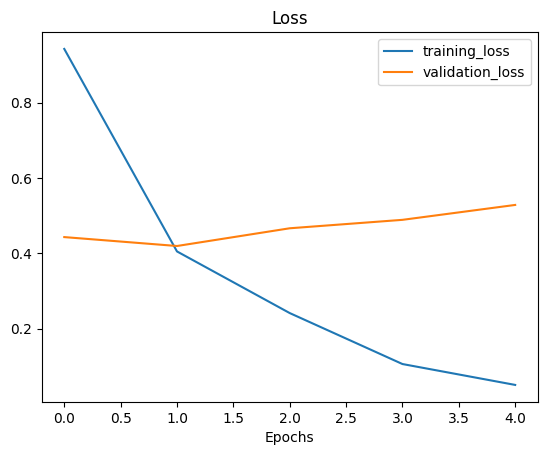

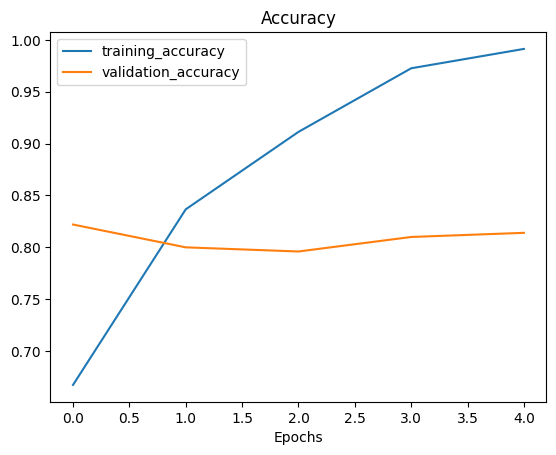

In [37]:
plot_model_history(model_4_history)

In [38]:
tf.random.set_seed(42);



model_5 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
]);


model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']);


model_5_history = model_5.fit(train_data,
            epochs=5,
            # steps_per_epoch=len(train_data),
            validation_data=test_data,
            # validation_steps=len(test_
)

model_5.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6385 - loss: 0.6389 - val_accuracy: 0.7740 - val_loss: 0.5083
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7548 - loss: 0.5317 - val_accuracy: 0.7860 - val_loss: 0.4620
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7746 - loss: 0.4602 - val_accuracy: 0.8480 - val_loss: 0.3808
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8067 - loss: 0.4433 - val_accuracy: 0.7920 - val_loss: 0.4157
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8029 - loss: 0.4234 - val_accuracy: 0.8740 - val_loss: 0.3409


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

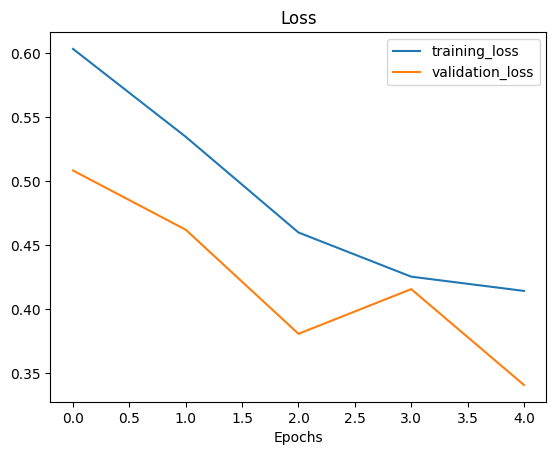

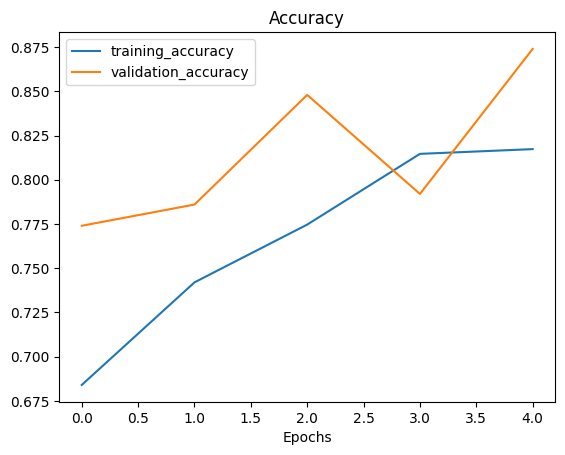

In [39]:
plot_model_history(model_5_history)

### Data Augmentation

In [52]:
train_data_augemented_generator = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True);

test_data_augemented_generator = ImageDataGenerator(rescale=1/255.);

train_data_non_augemented_generator = ImageDataGenerator(rescale=1/255.);
test_data_non_augemented_generator = ImageDataGenerator(rescale=1/255.);

In [54]:
train_data_augemented = train_data_augemented_generator.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32);

test_data_augemented = test_data_augemented_generator.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32);

train_data_non_augemented = train_data_non_augemented_generator.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32);


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


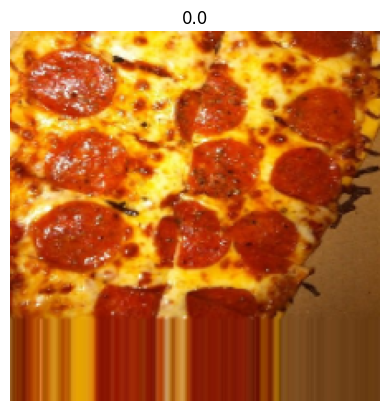

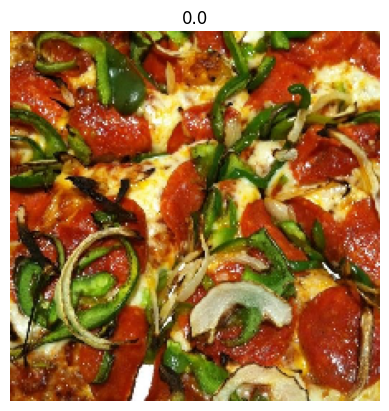

In [62]:
augemented_images = train_data_augemented[0][0];
augemented_labels = train_data_augemented[0][1];
images = train_data_non_augemented[0][0];
labels = train_data_non_augemented[0][1];
# write code to visualize the random images
idx = random.randint(0, len(augemented_images));
plt.imshow(augemented_images[idx])
plt.title(augemented_labels[idx])
plt.axis('off');
plt.figure();
plt.imshow(images[idx])
plt.title(labels[idx])
plt.axis('off');

In [63]:
model_6 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
]);

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']);


model_6_history = model_6.fit(train_data_augemented,
            epochs=5,
            # steps_per_epoch=len(train_data),
            validation_data=test_data_augemented,
            # validation_steps=len(test_
);

model_6.summary();

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5358 - loss: 0.6926 - val_accuracy: 0.7700 - val_loss: 0.5344
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.7380 - loss: 0.5414 - val_accuracy: 0.8040 - val_loss: 0.4215
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7797 - loss: 0.4845 - val_accuracy: 0.7900 - val_loss: 0.4488
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7987 - loss: 0.4670 - val_accuracy: 0.8440 - val_loss: 0.3602
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7752 - loss: 0.4873 - val_accuracy: 0.8680 - val_loss: 0.3159


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

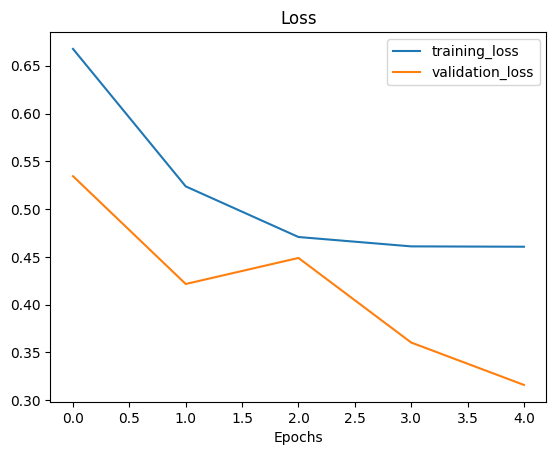

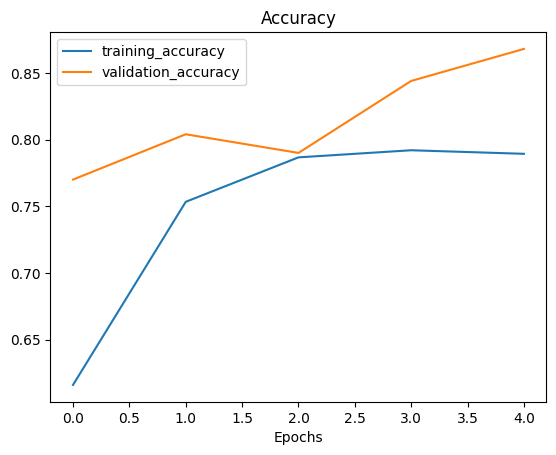

In [64]:
plot_model_history(model_6_history)

In [65]:
train_data_augmented_shuffled = train_data_augemented_generator.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [66]:
tf.random.set_seed(42);

model_7 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
]);

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']);

model_7_history = model_7.fit(train_data_augmented_shuffled,
            epochs=5,
            # steps_per_epoch=len(train_data),
            validation_data=test_data,
            # validation_steps=len(test_
);

model_7.summary();

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5797 - loss: 0.6870 - val_accuracy: 0.7900 - val_loss: 0.5052
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7406 - loss: 0.5603 - val_accuracy: 0.8280 - val_loss: 0.4084
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7451 - loss: 0.5171 - val_accuracy: 0.8440 - val_loss: 0.3664
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7653 - loss: 0.4938 - val_accuracy: 0.8540 - val_loss: 0.3745
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7525 - loss: 0.5028 - val_accuracy: 0.8720 - val_loss: 0.3585


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

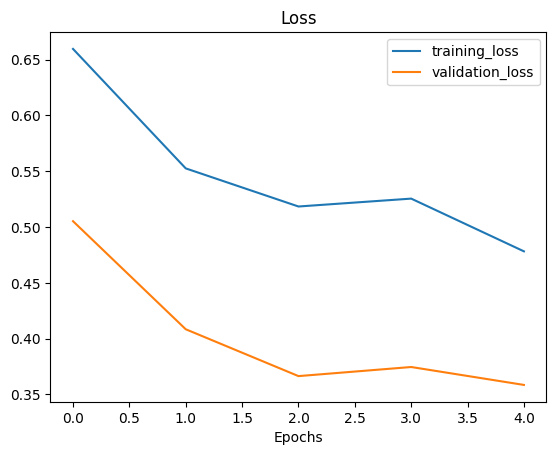

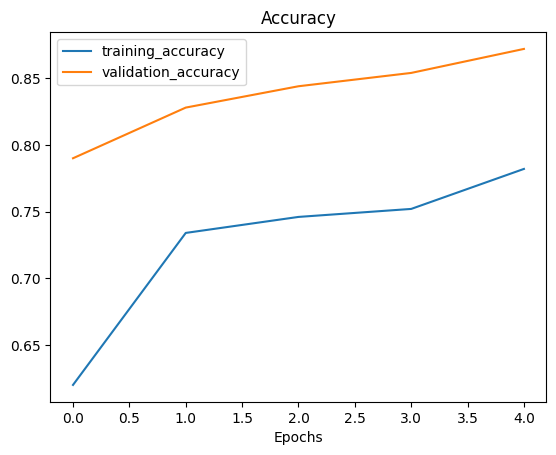

In [67]:
plot_model_history(model_7_history)

In [68]:
tf.random.set_seed(42);


model_8 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
]);


model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']);

model_8_history = model_8.fit(train_data_augmented_shuffled,
            epochs=5,
            # steps_per_epoch=len(train_data),
            validation_data=test_data,
            # validation_steps=len(test_
);

model_8.summary();


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.5556 - loss: 0.6889 - val_accuracy: 0.7860 - val_loss: 0.4664
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.7354 - loss: 0.5452 - val_accuracy: 0.8240 - val_loss: 0.4161
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.7785 - loss: 0.4987 - val_accuracy: 0.8540 - val_loss: 0.3532
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.8039 - loss: 0.4611 - val_accuracy: 0.8680 - val_loss: 0.3280
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.7736 - loss: 0.4751 - val_accuracy: 0.8220 - val_loss: 0.3996


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

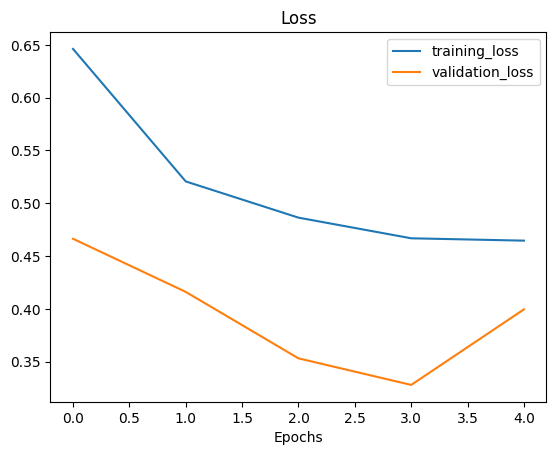

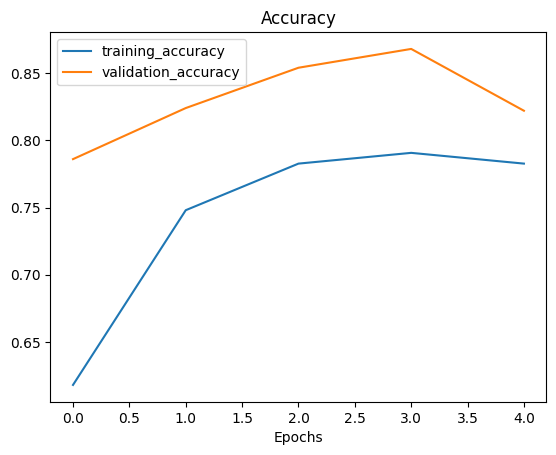

In [69]:
plot_model_history(model_8_history)

In [ ]:
# plot_model_history(model_1_history)
# print it when GPU is again available and can be run quickly from scratch

### Making a prediction with real world image

In [94]:
class_names = ['pizza', 'steak']
class_names

['pizza', 'steak']

--2024-08-02 00:00:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2024-08-02 00:00:15 (27.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



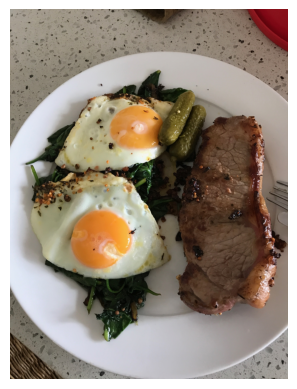

In [71]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

In [79]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [80]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_8.predict(steak)

In [81]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [82]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[0.8917803]], dtype=float32)

In [95]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [90]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  print(class_names)

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.8917803]]
['pizza', 'steak']


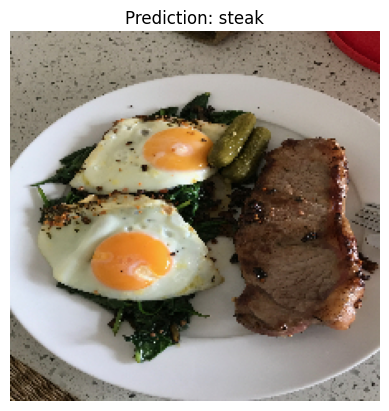

In [96]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2024-08-02 00:09:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2024-08-02 00:09:39 (35.3 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.317948]]
['pizza', 'steak']


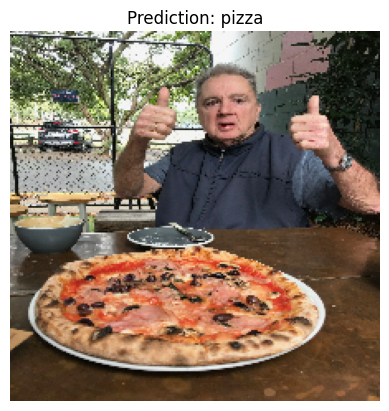

In [97]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

## Multi Class Computer Vision learning